<a href="https://colab.research.google.com/github/steve-shim/dlgom/blob/main/deeplearning/%EB%82%B4%EA%B0%80_%EC%93%B4_%EC%88%AB%EC%9E%90_%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

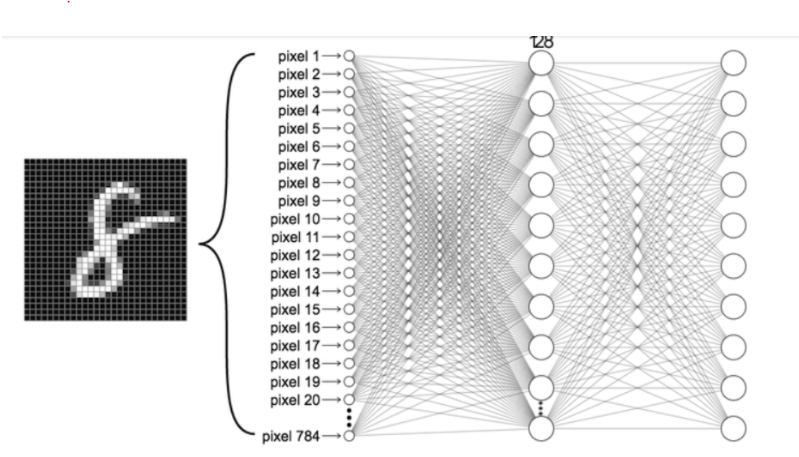

In [73]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [74]:
(X_train_all, y_train_all), (X_test, y_test) = load_data(path='mnist.npz')

X_train, X_val, y_train , y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, stratify=y_train_all)

In [75]:
print(X_train_all.shape)
print(y_train_all.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [76]:
print(X_train.shape, y_train.shape ,X_val.shape, y_val.shape)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,)


In [77]:
# 정규화 진행
X_test = X_test / 255.0
X_train = X_train / 255.0
X_val = X_val / 255.0

In [78]:
X_train = X_train.reshape(-1,784)
print(X_train.shape)
X_val = X_val.reshape(-1,784)
print(X_val.shape)
X_test = X_test.reshape(-1,784)
print(X_test.shape)

(48000, 784)
(12000, 784)
(10000, 784)


정답 데이터 준비 -> 원핫인코딩 필요

In [79]:
from tensorflow.keras.utils import to_categorical

print( to_categorical(7, num_classes=10) )
print( to_categorical([7,4,3,1,9], num_classes=10) )

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [80]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

print(y_train_onehot.shape)
print(y_val_onehot.shape)
print(y_test_onehot.shape)


(48000, 10)
(12000, 10)
(10000, 10)


In [81]:
for i,v in zip(y_train_onehot[:5], y_train[:5]):
  print(v,'->',i)

2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
4 -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3 -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,))) # 은닉1층
model.add(Dense(10, activation='softmax'))

**학습해야하는 가중치들의 수**

784 x 128 + 128 = 100480 개

128 x 10  + 10  = 1290 개 

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


아래 항목들은 매 epoch 마다의 값들이 저장되어 있습니다.

loss : 훈련 손실값
acc : 훈련 정확도
val_loss : 검증 손실값
val_acc : 검증 정확도

In [84]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])


In [85]:
h = model.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), epochs=30, batch_size=100)

Epoch 1/30
480/480 [==============================] - 2s 4ms/step - loss: 0.3646 - acc: 0.8988 - val_loss: 0.2132 - val_acc: 0.9418
Epoch 2/30
480/480 [==============================] - 2s 4ms/step - loss: 0.1672 - acc: 0.9522 - val_loss: 0.1552 - val_acc: 0.9554
Epoch 3/30
480/480 [==============================] - 2s 3ms/step - loss: 0.1209 - acc: 0.9652 - val_loss: 0.1301 - val_acc: 0.9603
Epoch 4/30
480/480 [==============================] - 2s 3ms/step - loss: 0.0930 - acc: 0.9732 - val_loss: 0.1105 - val_acc: 0.9662
Epoch 5/30
480/480 [==============================] - 2s 4ms/step - loss: 0.0743 - acc: 0.9790 - val_loss: 0.1069 - val_acc: 0.9685
Epoch 6/30
480/480 [==============================] - 2s 4ms/step - loss: 0.0607 - acc: 0.9832 - val_loss: 0.0992 - val_acc: 0.9696
Epoch 7/30
480/480 [==============================] - 2s 3ms/step - loss: 0.0503 - acc: 0.9860 - val_loss: 0.0965 - val_acc: 0.9697
Epoch 8/30
480/480 [==============================] - 2s 4ms/step - loss: 0.

In [93]:
model.evaluate(X_test, y_test_onehot)
# [0.1782202273607254, 0.9466000199317932] 정규화를 안했을때 훈련데이터의 오차와 정확도 값

313/313 [==============================] - 1s 2ms/step - loss: 0.0982 - acc: 0.9792


[0.09816186875104904, 0.979200005531311]

In [92]:
model.evaluate(X_val, y_val_onehot)

375/375 [==============================] - 1s 2ms/step - loss: 0.1068 - acc: 0.9777


[0.10679077357053757, 0.9776666760444641]

In [102]:
result = model.predict(X_test)
print(result.shape)

result2 = np.argmax(result, axis=1)
print(np.argmax(result, axis=1).shape)
print(result2)

print("테스트 데이터 정확도",np.mean(result2 == y_test))

(10000, 10)
(10000,)
[7 2 1 ... 4 5 6]
테스트 데이터 정확도 0.9792


In [170]:
# 모델에 예측을 시키려고할 때는 반드시 2차원 행렬로 넣어줘야한다
# (784,) -> (1,784)

result1 = model.predict(X_test[0].reshape(1,-1))
print(result1)
print("테스트데이터의 첫번째 값:", np.argmax(result1, axis=1))
print("테스트데이터의 정답 값:", y_test[0])

[[4.7269843e-14 3.2112832e-16 1.3536311e-12 6.0957518e-07 1.9531434e-16
  8.5626296e-14 2.4813189e-22 9.9999940e-01 1.9389796e-12 2.1943562e-10]]
테스트데이터의 첫번째 값: [7]
테스트데이터의 정답 값: 7


In [88]:
import matplotlib.pyplot as plt

print(h.history)
print(type(h.history))  # <class 'dict'>
print(h.history.keys()) # dict_keys(['loss', 'acc'])
print(type(h.history['loss']))
print(len(h.history['loss'])) # epoch 마다의 훈련데이터 손실 기록
print(len(h.history['val_loss'])) # epoch 마다의 검증데이터 손실 기록
print(len(h.history['acc']))  # epoch 마다의 훈련데이터 정확도를 기록한다
print(len(h.history['val_acc']))  # epoch 마다의 검증데이터 정확도를 기록한다


{'loss': [0.36461979150772095, 0.1672050505876541, 0.12085665762424469, 0.09295854717493057, 0.07434840500354767, 0.060722965747117996, 0.05032413825392723, 0.04190455749630928, 0.03553244471549988, 0.030758613720536232, 0.026603272184729576, 0.021559547632932663, 0.017688797786831856, 0.015202300623059273, 0.013333975337445736, 0.011298509314656258, 0.009934001602232456, 0.008684061467647552, 0.007983925752341747, 0.006942493375390768, 0.004183580633252859, 0.004985644482076168, 0.0063650296069681644, 0.003091841470450163, 0.003355528926476836, 0.002315377350896597, 0.0036646779626607895, 0.0073511176742613316, 0.0027619076427072287, 0.0009669569553807378], 'acc': [0.898770809173584, 0.9522083401679993, 0.9651874899864197, 0.973229169845581, 0.9789583086967468, 0.9832291603088379, 0.9860000014305115, 0.9886666536331177, 0.9904791712760925, 0.9916666746139526, 0.9929791688919067, 0.9947291612625122, 0.9960833191871643, 0.9964583516120911, 0.9972500205039978, 0.9977916479110718, 0.99762

epoch마다 모델의 훈련데이터와 검증데이터의 손실값들과 정확도를 그래프로 확인한다

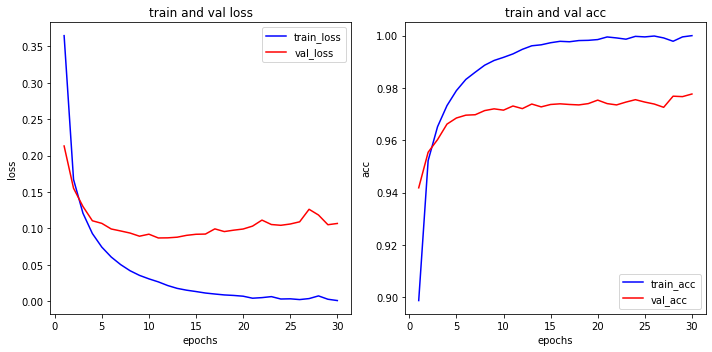

In [89]:
import matplotlib.pyplot as plt

his_dict = h.history # 딕셔너리 
loss = his_dict['loss'] # 리스트
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend() # label 적어준 값들 출력

acc = his_dict['acc'] # 리스트
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend() # label 에 적어준 값들 출력

plt.tight_layout()
plt.show()

In [ ]:
# 모델 저장하기

model.save('my_model.h5')

In [ ]:
# 모델 불러오기
from tensorflow.keras.models import load_model

new_model = load_model('my_model.h5')

In [ ]:
# 새로 불러온 모델을 이용해서 바로 평가
new_model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 1ms/step - loss: 0.0982 - acc: 0.9792


[0.09816186875104904, 0.979200005531311]

In [169]:
result = new_model.predict(X_test[3].reshape(1,-1))
print("테스트데이터의 4번째 값 예측:",np.argmax(result, axis=1))
print("데스트데이터의 4번째 값 정답", y_test[3])

테스트데이터의 4번째 값 예측: [0]
데스트데이터의 4번째 값 정답 0


내가 쓴 숫자(seven.jpg)를 학습이 완료된 모델에 예측해보기 위해서 현재작업경로에 저장한다.

많은 파일들을 다뤄야 하는 파이썬 프로그램을 작성할 때, 특정한 패턴이나 확장자를 가진 파일들의 경로나 이름이 필요할 때가 있다. glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환한다.

In [200]:
import glob
import  os 

path = '.'
print("현재작업경로에 위치한 파일들:",os.listdir(path))
print("s로 시작하고 .jpg로 끝나는 파일들:",glob.glob('s*.jpg'))

현재작업경로에 위치한 파일들: ['.config', 'a.jpg', 'seven.jpg', 'b.jpg', '.ipynb_checkpoints', 'aa.jpg', '.\\aa.jpg', 'my_model.h5', 'sample_data']
s로 시작하고 .jpg로 끝나는 파일들: ['seven.jpg']


In [201]:
import  cv2

for k in glob.glob('s*.jpg'):
    print(k)
    img = cv2.imread(k)
    # img = cv2.imread("./"+k)
print(img.shape)

seven.jpg
(131, 138, 3)


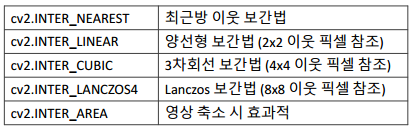

현재 작업경로에 있는 seven.jpg 이미지를 축소시켜 resize_img 로 저장한다

seven.jpg
(28, 28, 3)


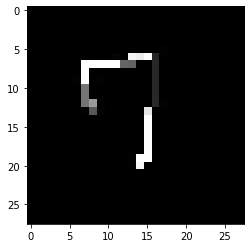

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for k in glob.glob('s*.jpg'):
    print(k)
    img = cv2.imread(k)
    height, width = img.shape[:2]
    resize_img = cv2.resize(img, (28 , 28), interpolation=cv2.INTER_CUBIC)
    print(resize_img.shape)
    cv2.imwrite('seven_reshape.jpg', resize_img) # 저장할 경로, 저장할 이미지   
    
plt.imshow(resize_img)
plt.show() 

위에서 저장한 3차원 이미지 seven_reshape.jpg 를 가져와서 2차원으로 만들고 seven_gray 로 저장한다

(28, 28)


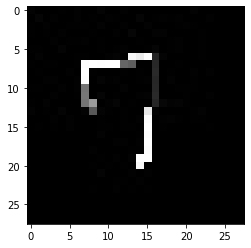

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    # 내적결과 (28, 28, 3) -> (28, 28) 
    # R,G,B 색을 적절하게 섞어서 gray_scale 로 만드는데 반영한다

img = cv2.imread('seven_reshape.jpg')
seven_gray = rgb2gray(img)
cv2.imwrite('seven_gray.jpg',gray)
print(seven_gray.shape)
plt.imshow(seven_gray, cmap = plt.get_cmap('gray'))
plt.show()

In [204]:
img2 = cv2.imread('seven_gray.jpg', cv2.IMREAD_GRAYSCALE)
# img2 = mpimg.imread('seven_gray.jpg')

img2.shape

(28, 28)

In [205]:
x2 = img2.reshape(1,-1)
x2.shape

(1, 784)

In [206]:
# 훈련된 모델(my_model.h5)로 내가 쓴 숫자(7)를 인식시키기

from tensorflow.keras.models import load_model
new_model2 = load_model('my_model.h5')
result2 = new_model2.predict(x2)
print(result2)
print("예측결과:", np.argmax(result2))


[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
예측결과: 7
